# creating a model for predicting a price

In [1]:
# importing a necesary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot


In [2]:
# importing a dataset
Cars = pd.read_csv("toyotacorolla.csv",encoding = 'latin1') # using eancoding beause it has some jason file in a data itself
Cars.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


# EDA part

In [3]:
Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
#[cars("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")] 
# we want to predict prize on the basis of above columns only according to problem statements
# Doing EDA for getting required columns  according to problem statement
Toyota =pd.concat([Cars.iloc[:,2:4],Cars.iloc[:,6:7],Cars.iloc[:,8:9],Cars.iloc[:,12:14],Cars.iloc[:,15:18]],axis=1)
Toyota

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [5]:
Toyota.isnull().sum() # checking if there are null values in data set 

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [6]:
# Renaming the columns for calling columns easily with more human redability
Toyota1 = Toyota.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis = 1)

In [7]:
# cheking for duplicate values
Toyota1[Toyota1.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [8]:
# dropping duplicate values
Toyota2 = Toyota1.drop_duplicates().reset_index(drop = True)
Toyota2.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [9]:
Toyota2.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

In [10]:
Toyota2.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [11]:
#finding correlation
Toyota2.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


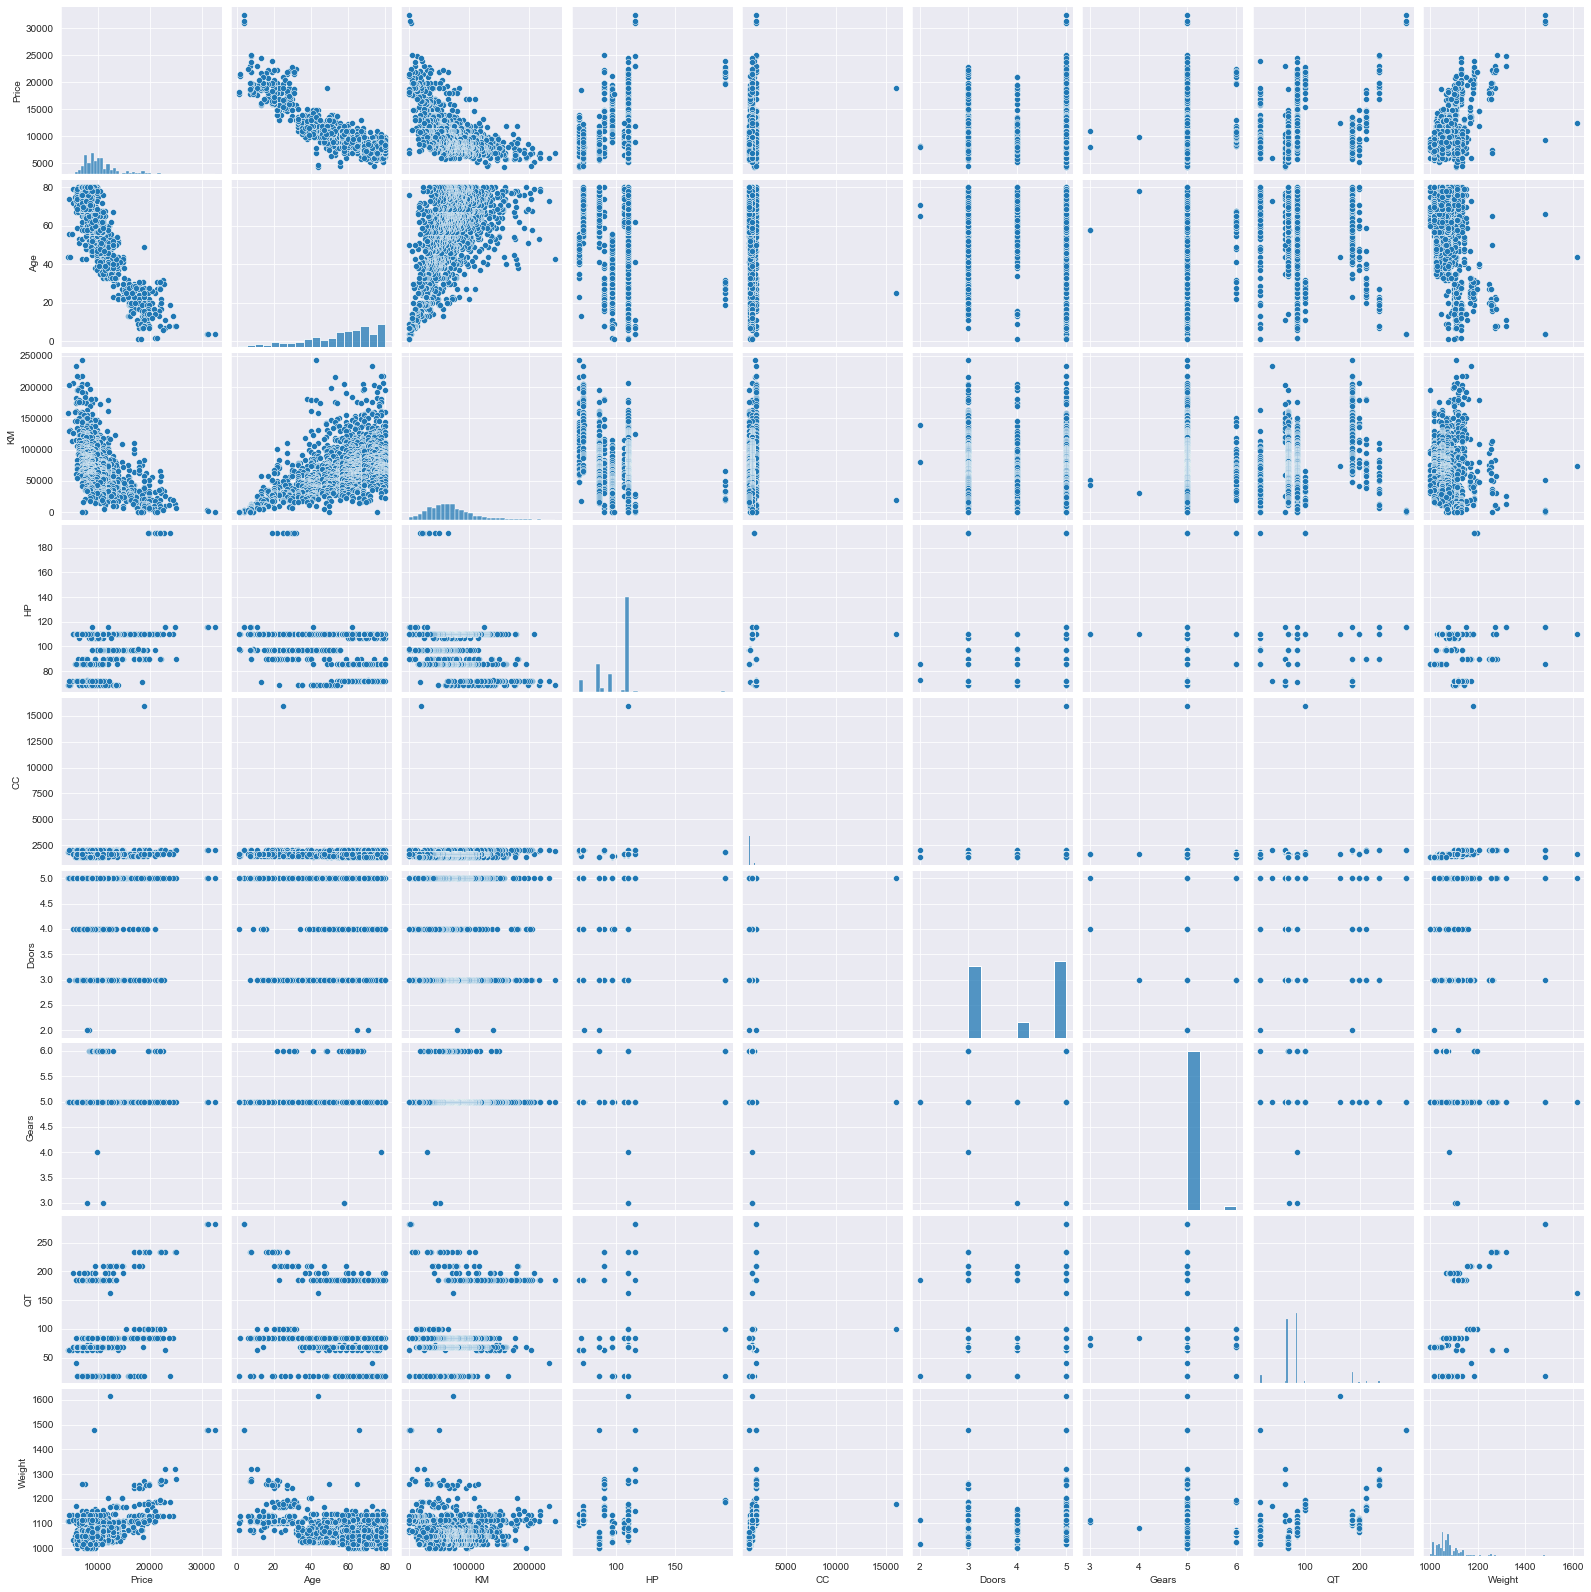

In [12]:
#scatter plot of each variable to see corelation of a data
sns.set_style(style = 'darkgrid')
sns.pairplot(Toyota2)

# Model building

In [13]:
# model building
# here we want to predict price which is y which is our output variable and others are x1,x2,x3.....x8 which are our input variable
# building a model
model_price = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data = Toyota2).fit() # fitiing the data or learning from the data

In [14]:
model_price.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [15]:
print(model_price.tvalues, '\n' ,np.round(model_price.pvalues,5))

Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
CC           -1.316436
Doors        -0.023012
Gears         3.034563
QT            2.944198
Weight       15.760663
dtype: float64 
 Intercept    0.00011
Age          0.00000
KM           0.00000
HP           0.00000
CC           0.18824
Doors        0.98164
Gears        0.00245
QT           0.00329
Weight       0.00000
dtype: float64


In [16]:
(model_price.rsquared,model_price.rsquared_adj)

(0.8625200256947001, 0.8617487495415147)

## building two simple linear regression and multilinear regression models for cc and doors because they are not significant


In [17]:
mlf_cc = smf.ols("Price~CC",data = Toyota2).fit()
print(mlf_cc.tvalues,np.round(mlf_cc.pvalues,6))

Intercept    24.879592
CC            4.745039
dtype: float64 Intercept    0.000000
CC           0.000002
dtype: float64


In [18]:
mlf_doors = smf.ols("Price~Doors",data = Toyota2).fit()
print(mlf_doors.tvalues,np.round(mlf_doors.pvalues,12))

Intercept    19.421546
Doors         7.070520
dtype: float64 Intercept    0.000000e+00
Doors        2.000000e-12
dtype: float64


In [19]:
mlf_cc_doors = smf.ols("Price~CC+Doors",data=Toyota2).fit()
print(mlf_cc_doors.tvalues,mlf_cc_doors.pvalues)

Intercept    12.786341
CC            4.268006
Doors         6.752236
dtype: float64 Intercept    1.580945e-35
CC           2.101878e-05
Doors        2.109558e-11
dtype: float64


## Calculating vif

In [20]:
rsq_Age = smf.ols("Age~KM+HP+CC+Doors+Gears+QT+Weight",data=Toyota2).fit().rsquared
vif_Age = 1/(1-rsq_Age)

rsq_KM = smf.ols("KM~Age+HP+CC+Doors+Gears+QT+Weight",data=Toyota2).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols("HP~Age+CC+Doors+Gears+QT+Weight+KM",data=Toyota2).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_CC = smf.ols("CC~Age+Doors+Gears+QT+Weight+HP+KM",data=Toyota2).fit().rsquared
vif_CC = 1/(1-rsq_CC)

rsq_Doors = smf.ols("Doors~Age+CC+Gears+QT+Weight+HP+KM",data=Toyota2).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols("Gears~Age+CC+Doors+QT+Weight+HP+KM",data=Toyota2).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)

rsq_QT = smf.ols("QT~Age+CC+Doors+Gears+Weight+HP+KM",data=Toyota2).fit().rsquared
vif_QT = 1/(1-rsq_QT)

rsq_Weight = smf.ols("Weight~Age+CC+Doors+Gears+QT+HP+KM",data=Toyota2).fit().rsquared
rsq_weight = 1/(1-rsq_Weight)

d1 = {'variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],'vif':[vif_Age,vif_KM,vif_HP,vif_CC,vif_Doors,vif_Gears,vif_QT,rsq_weight]}
vif_frame = pd.DataFrame(d1)
vif_frame

,variables,vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


## residual analysis
### test for normality of residual

C:\Users\ashish\anaconda\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


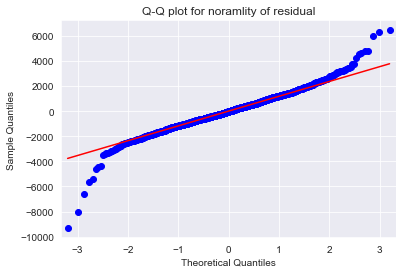

In [21]:
qqplot = sm.qqplot(model_price.resid,line='q')
plt.title("Q-Q plot for noramlity of residual")
plt.show()

# to check homoscadisity

In [22]:
def get_standardize_values( vals ):
    return(vals-vals.mean())/vals.std()

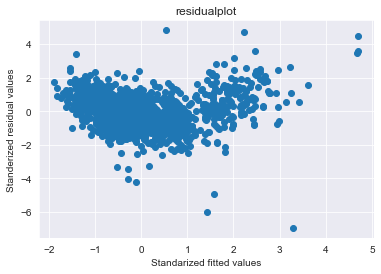

In [23]:
# ei vs fyi > residualvalues vs fiteed values
plt.scatter(get_standardize_values(model_price.fittedvalues),get_standardize_values(model_price.resid))
plt.title("residualplot")
plt.xlabel("Standarized fitted values")
plt.ylabel("Standerized residual values")
plt.show()

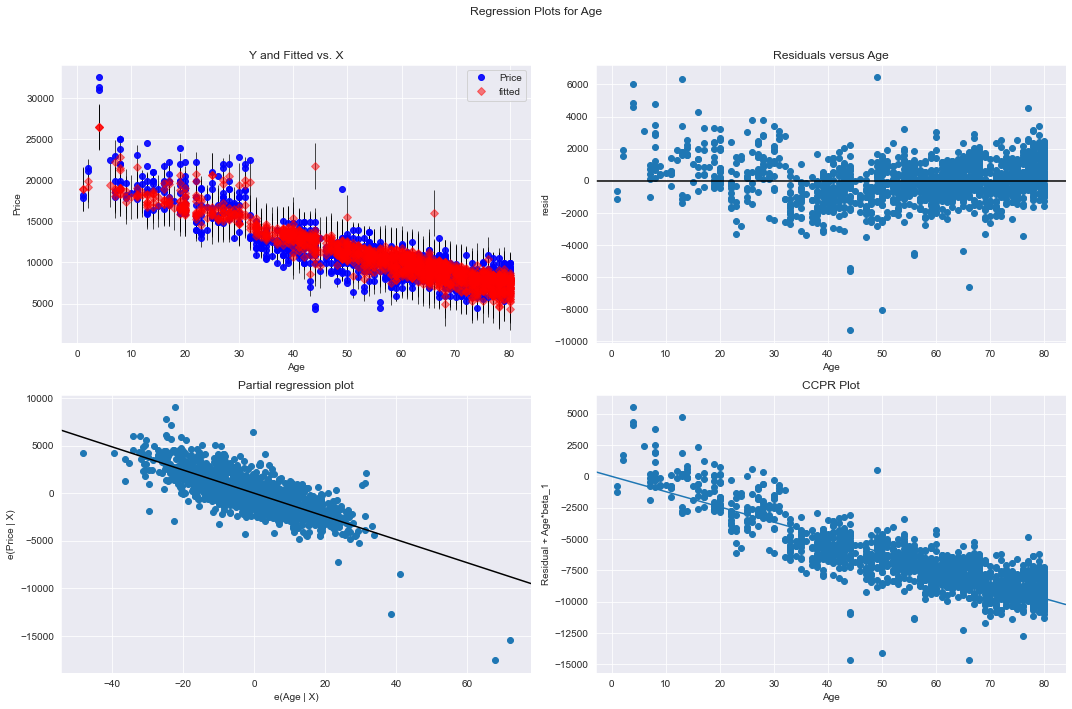

In [24]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model_price,'Age', fig = fig)
plt.show()

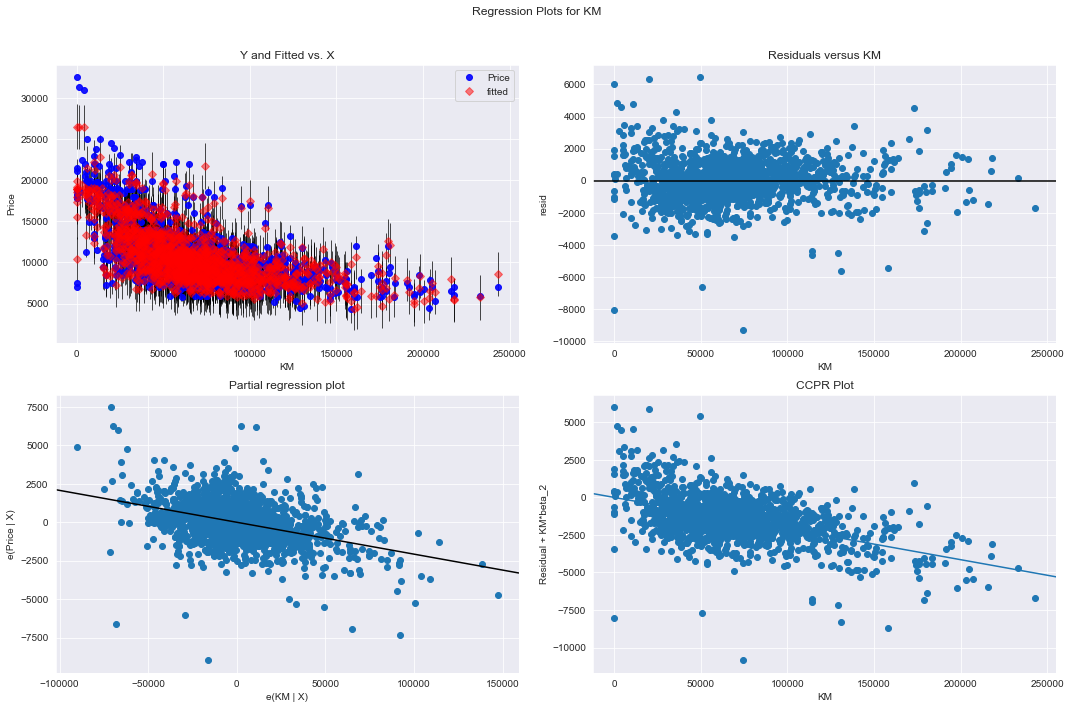

In [25]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model_price,'KM',fig = fig)

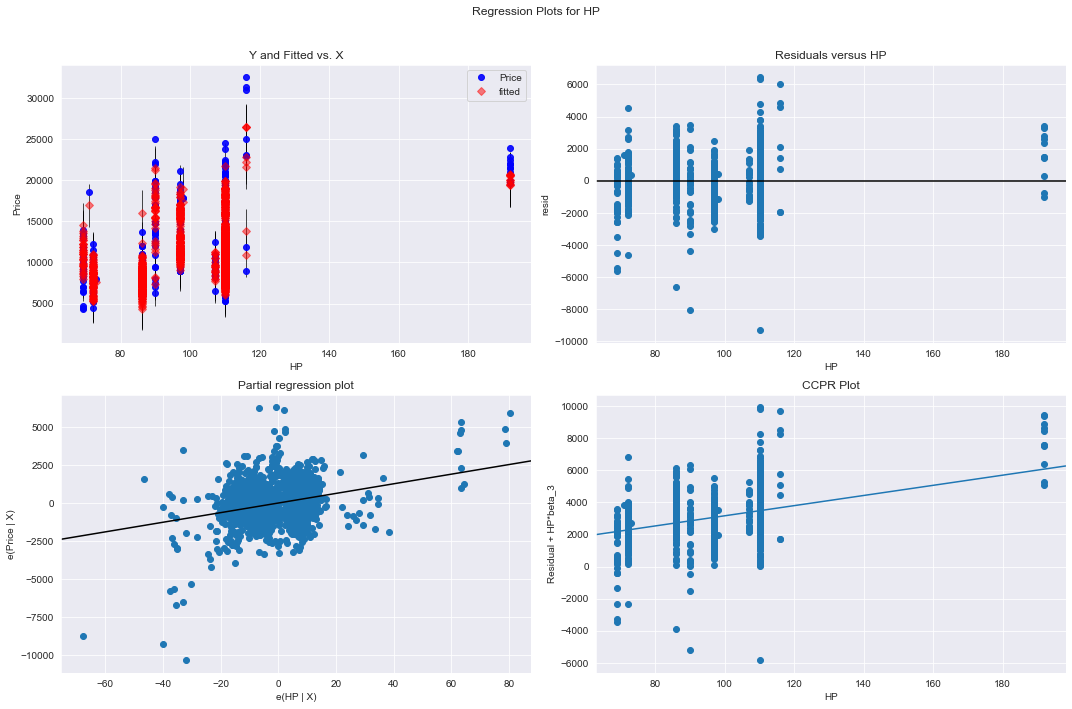

In [26]:
fig = plt.figure(figsize = (15,10))
fig  = sm.graphics.plot_regress_exog(model_price,'HP',fig = fig)

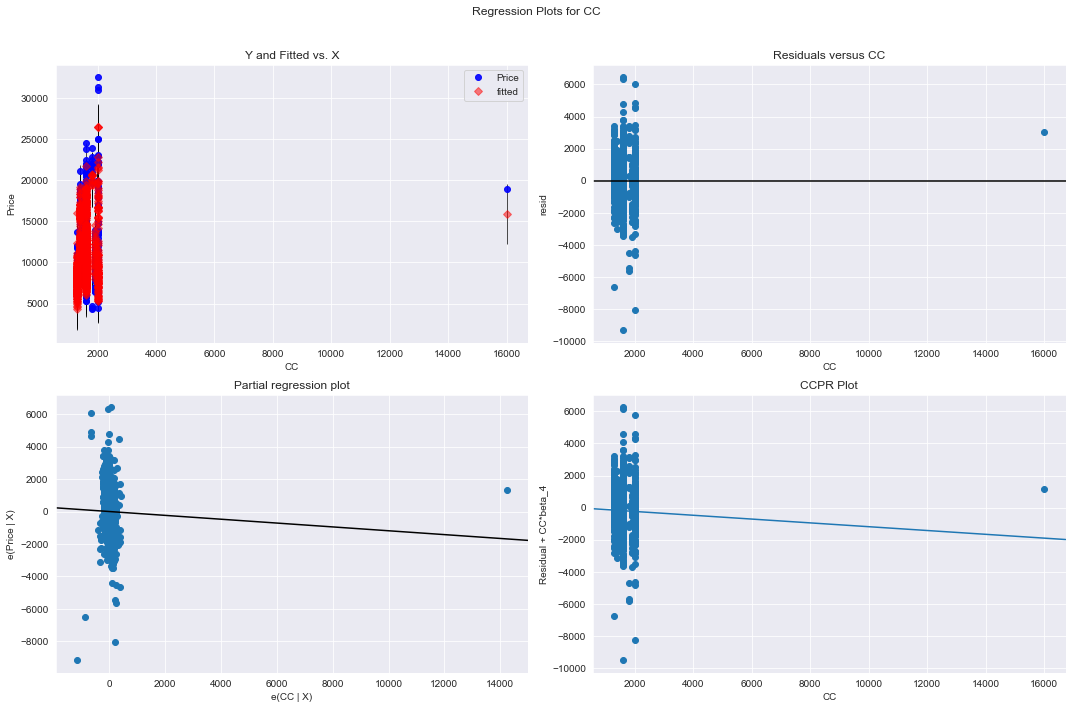

In [27]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model_price,'CC',fig = fig )

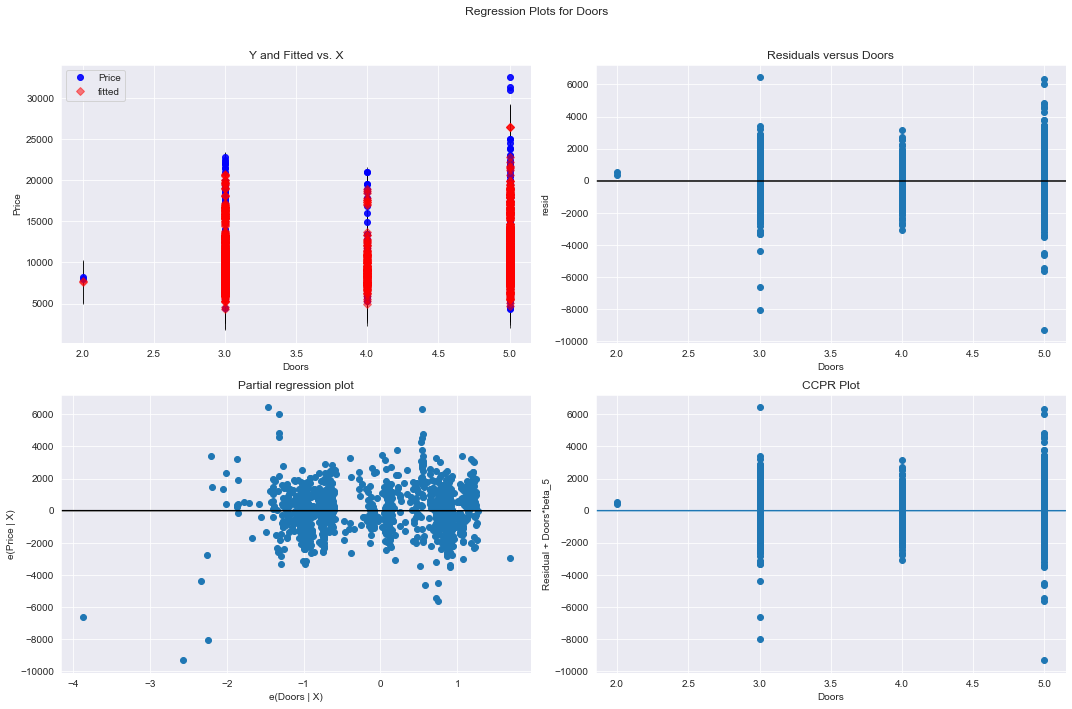

In [28]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model_price,'Doors',fig = fig )

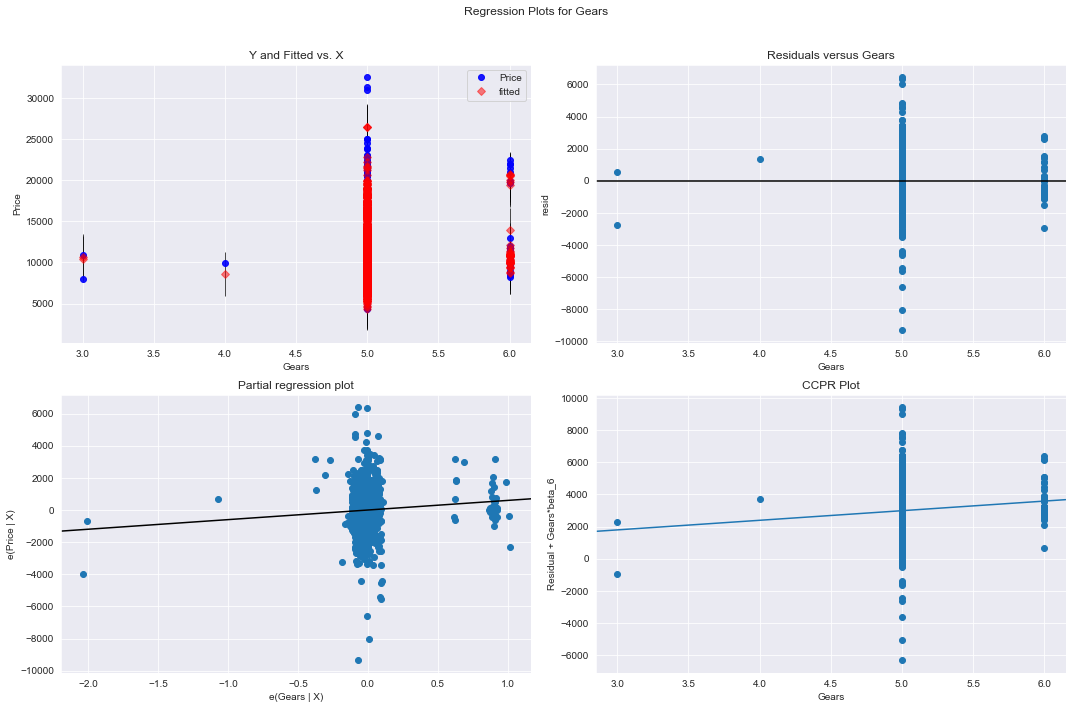

In [29]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model_price,'Gears',fig = fig )

# model deletion digonastic

### detecting influencers and outliers

### 1) Cook's distance 2) Levrage value

In [32]:
(c,_) = model_price.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

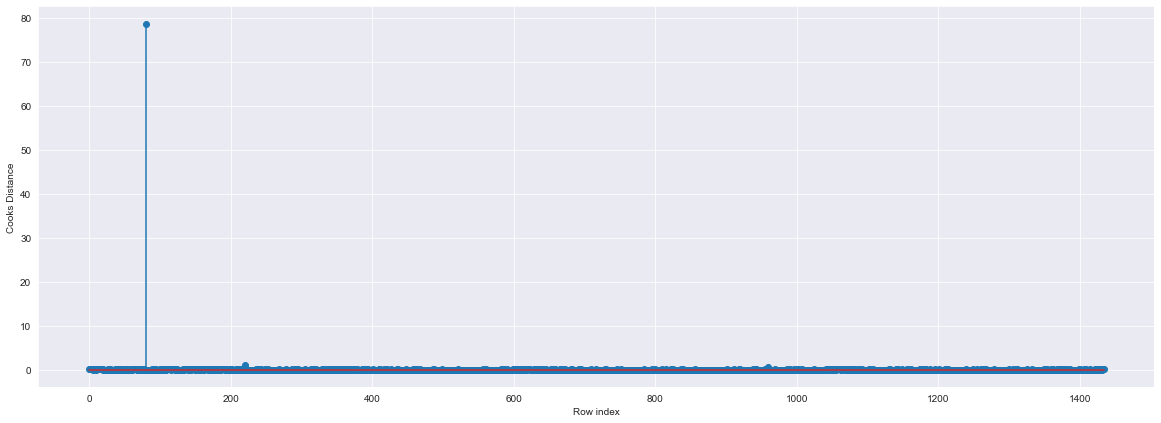

In [33]:
# ploting the influence using steam plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Toyota2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [34]:
np.argmax(c), np.max(c)

(80, 78.7295058224984)

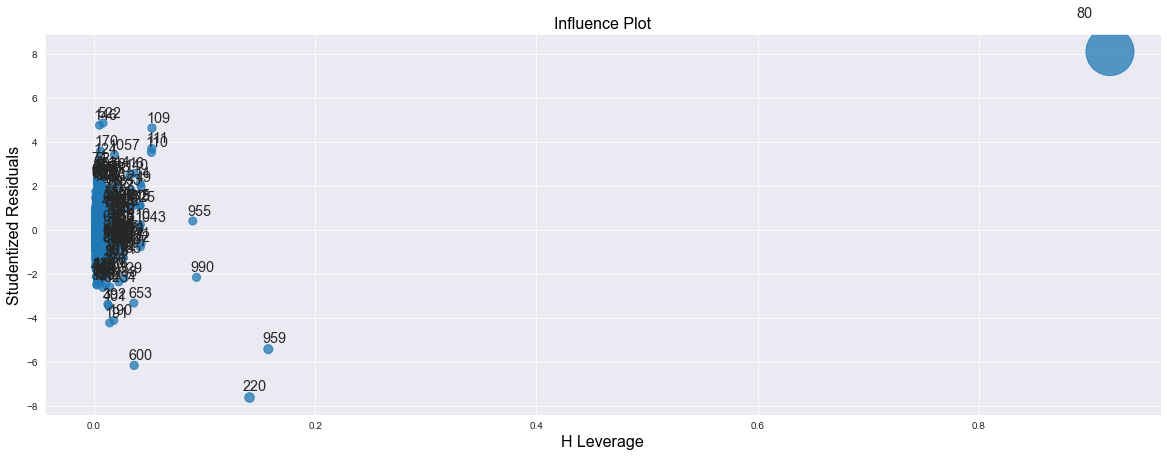

In [39]:
fig,ax=plt.subplots(figsize=(20,7))
fig=influence_plot(model_price,ax = ax)

In [41]:
# H_leverage cutoff
k=Toyota2.shape[1]
n=Toyota2.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [42]:
Toyota2[Toyota2.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


## improving the model

In [43]:
# Creating a copy of data so that original dataset is not affected
Toyota2_new=Toyota2.copy()
Toyota2_new

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [44]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
Toyota3=Toyota2_new.drop(Toyota2_new.index[[80]],axis=0).reset_index(drop=True)
Toyota3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


# Model deletion dignostic

In [52]:
if np.max(c)>0.5:
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=Toyota3).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    Toyota3=Toyota3.drop(Toyota3.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyo5 
elif np.max(c)<0.5:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=Toyota3).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [53]:
final_model.rsquared

0.8882395145171204

In [54]:
Toyota3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


# Model prediction

In [56]:
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [63]:
price = final_model.predict(new_data)
print(price)

0    14341.570181
dtype: float64
